### 前処理

In [1]:
from PIL import Image
import sys
from matplotlib import pyplot as plt

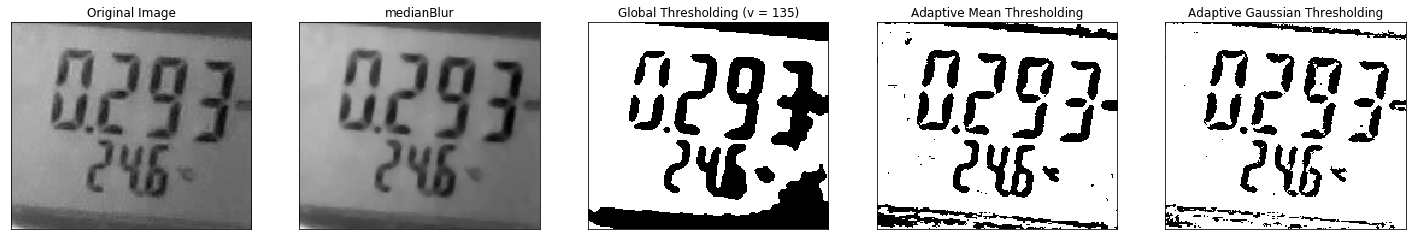

In [105]:
#imageのグレースケール・二値化
import cv2
def get_img(path):

    orig = cv2.imread(path, 0)
    img = cv2.medianBlur(orig, 5)
    ret,th = cv2.threshold(img, 135, 255, cv2.THRESH_BINARY)
    th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
    th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    images = [orig, img, th, th2, th3]
    titles = ['Original Image', 'medianBlur', 'Global Thresholding (v = 135)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    
    
    plt.figure(figsize=(25,10))
    
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    
    plt.show()
    
    return orig, img, th, th2, th3

img = []
img = get_img('train_data/sample/CD_53分35秒_240.JPG')

for i in range(5):
    save_img = Image.fromarray(img[i])
    name = "test" + str(i) + ".tif"
    save_img.save("Input/"+ name)

In [106]:
#イメージ切り取り
path = "Input/test2.tif"
img = cv2.imread(path, 0)
img_cut =img[20:95,:] # 固定パラメータ

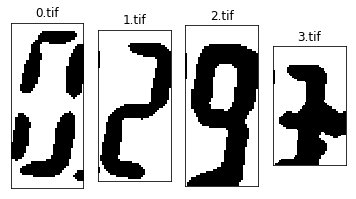

In [107]:
%matplotlib inline
#数字ごとに切り取り
n = []
h = []
for i in range(len(img_cut[0,:])):
    n.append(i)
    h.append(sum(img_cut[:,i]/255))
cut1 = [i for i, x in enumerate(h)  if x < 75]
count = 0
v=[]
for i in range(len(cut1)-1):
    if cut1[i] == cut1[i+1] - 1:
        v.append(count)
    else:
        count+=1
        v.append(count)

for n in range(count+1):
    num = [ii for ii, x in enumerate(v)  if x == n]
    num2 = []
    for i in num:
        num2.append(cut1[i])
    img_cut2 = img_cut[:,num2]
    save_img = Image.fromarray(img_cut2)
    name = str(n)+".tif"
    
    plt.subplot(1,count+1,n+1)
    plt.imshow(img_cut2,'gray')
    plt.title(name)
    plt.xticks([]),plt.yticks([])
    
    save_img.save("Input/"+name)

### run pyocr

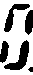

In [130]:
import pyocr
import pyocr.builders
tools = pyocr.get_available_tools()
tool = tools[0]
#使用する画像
path = "Input/0.tif"
res = tool.image_to_string(
    #'Global Thresholding (v = 135)'を使用
    Image.open(path),
    #langはeng
    lang="eng",
    builder=pyocr.builders.DigitBuilder(tesseract_layout=6)
)
res2 = tool.image_to_string(
    #'Global Thresholding (v = 135)'を使用
    Image.open(path),
    #trainしたlangを使用
    lang="led",
    builder=pyocr.builders.DigitBuilder(tesseract_layout=6)
)
res3 = tool.image_to_string(
    #'Global Thresholding (v = 135)'を使用
    Image.open(path),
    #trainしたlangを使用
    lang="num",
    builder=pyocr.builders.DigitBuilder(tesseract_layout=6)
)

tmp = cv2.imread(path, 0)
Image.fromarray(tmp)

In [131]:
##result
print("lang=eng")
print(res)
print("\n lang=led")
print(res2)
print("\n lang=num")
print(res3)

lang=eng
ir
J

 lang=led
0.2
5.5.

 lang=num
0
80


In [133]:
import pytesseract
import csv
img = Image.open("Input/0.tif")
data = pytesseract.image_to_data(img, lang='num', config='--psm 6')
tsv = csv.reader(data.splitlines(), delimiter='\t')
for row in tsv:
  print(row)

['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text']
['1', '1', '0', '0', '0', '0', '0', '0', '33', '75', '-1', '']
['2', '1', '1', '0', '0', '0', '0', '4', '33', '68', '-1', '']
['3', '1', '1', '1', '0', '0', '0', '4', '33', '68', '-1', '']
['4', '1', '1', '1', '1', '0', '4', '4', '29', '31', '-1', '']
['5', '1', '1', '1', '1', '1', '4', '4', '29', '31', '94', '0']
['4', '1', '1', '1', '2', '0', '0', '40', '33', '32', '-1', '']
['5', '1', '1', '1', '2', '1', '0', '40', '33', '32', '56', '80']


/Users/hotaruco/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:569: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  tag, len(values)))
/Users/hotaruco/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:569: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  tag, len(values)))


### train data作成

In [5]:
##train_data作成
import glob
rowfile = glob.glob("train_data/sample/CD*")
print(rowfile)

['train_data/sample/CD_53分36秒_914.JPG', 'train_data/sample/CD_23分35秒_007.JPG', 'train_data/sample/CD_23分34秒_617.JPG', 'train_data/sample/CD_08分36秒_537.JPG', 'train_data/sample/CD_53分35秒_762.JPG', 'train_data/sample/CD_08分35秒_979.JPG', 'train_data/sample/CD_08分34秒_428.JPG', 'train_data/sample/CD_08分35秒_370.JPG', 'train_data/sample/CD_38分35秒_146.JPG', 'train_data/sample/CD_23分36秒_680.JPG', 'train_data/sample/CD_53分36秒_427.JPG', 'train_data/sample/CD_08分34秒_895.JPG', 'train_data/sample/CD_38分36秒_819.JPG', 'train_data/sample/CD_23分35秒_477.JPG', 'train_data/sample/CD_38分34秒_047.JPG', 'train_data/sample/CD_23分36秒_219.JPG', 'train_data/sample/CD_38分34秒_706.JPG', 'train_data/sample/CD_53分35秒_240.JPG', 'train_data/sample/CD_08分51秒_263.JPG', 'train_data/sample/CD_53分34秒_337.JPG', 'train_data/sample/CD_38分36秒_319.JPG', 'train_data/sample/CD_38分35秒_602.JPG', 'train_data/sample/CD_53分34秒_790.JPG']


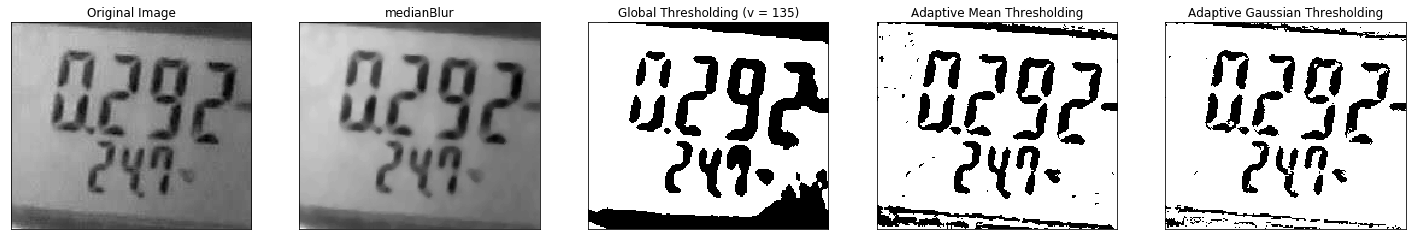

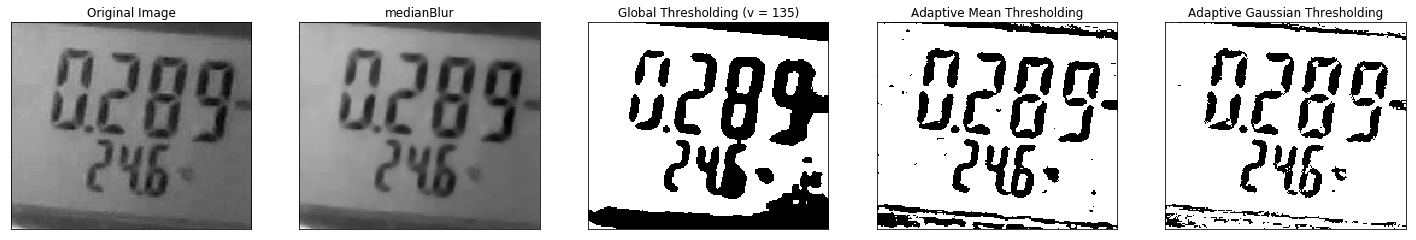

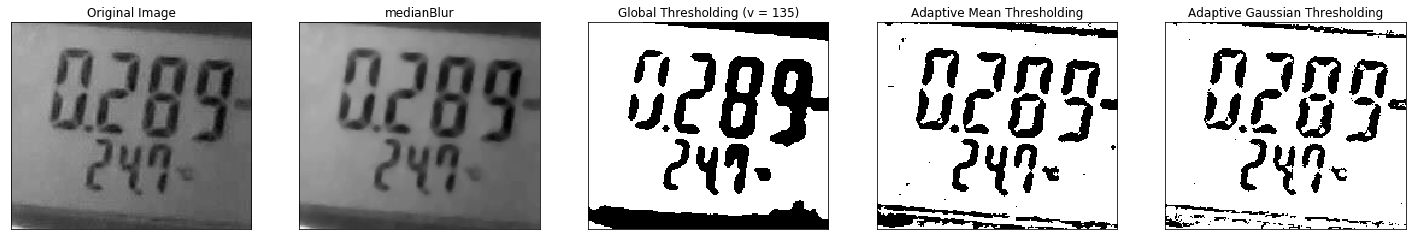

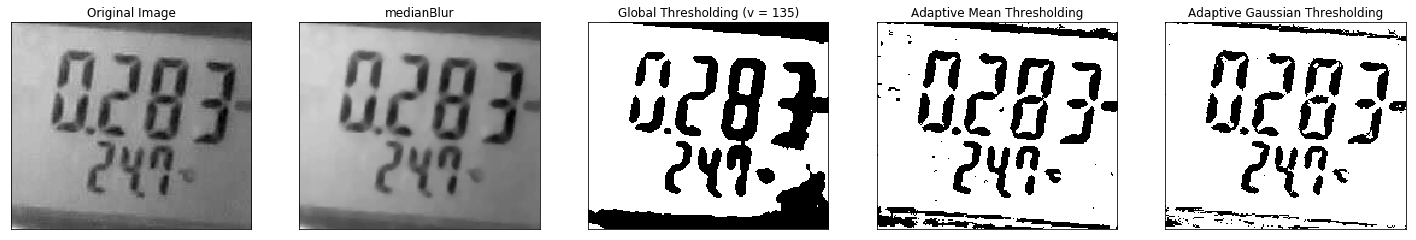

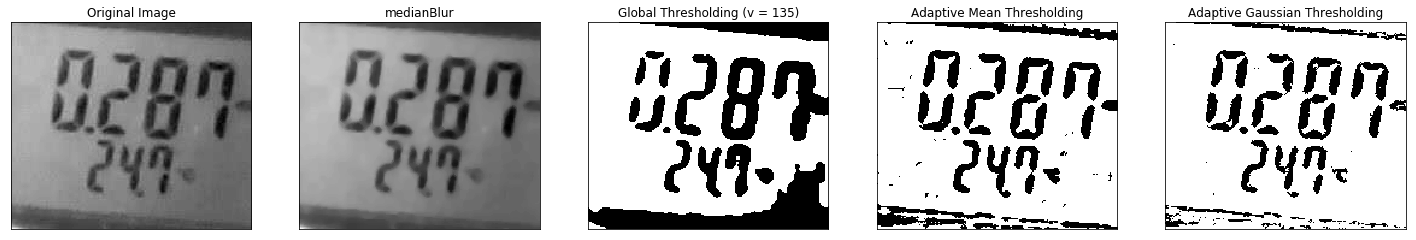

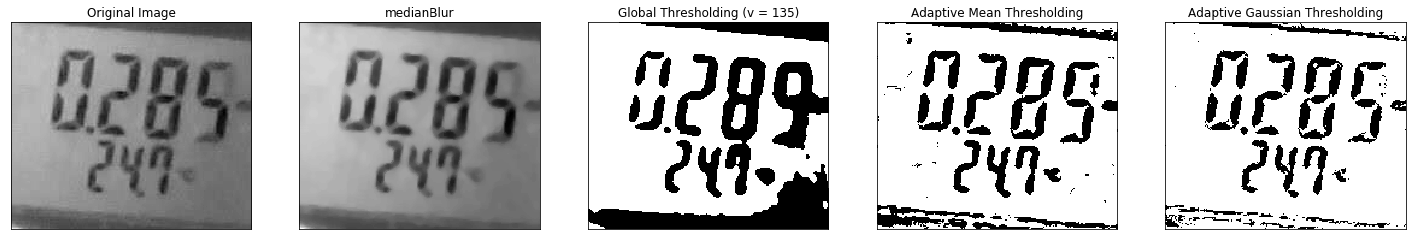

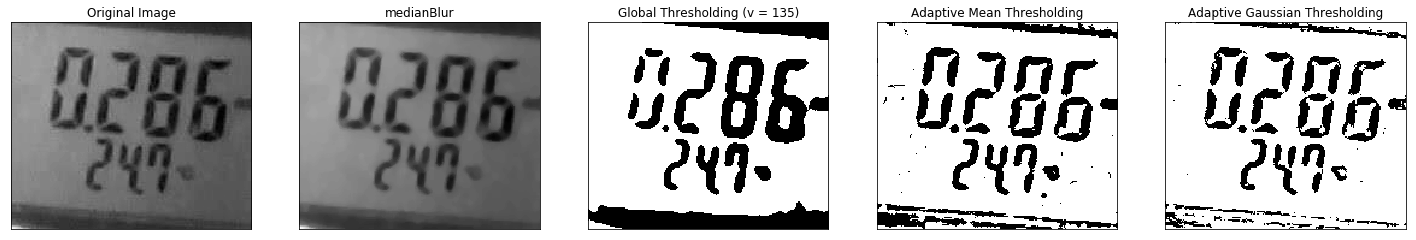

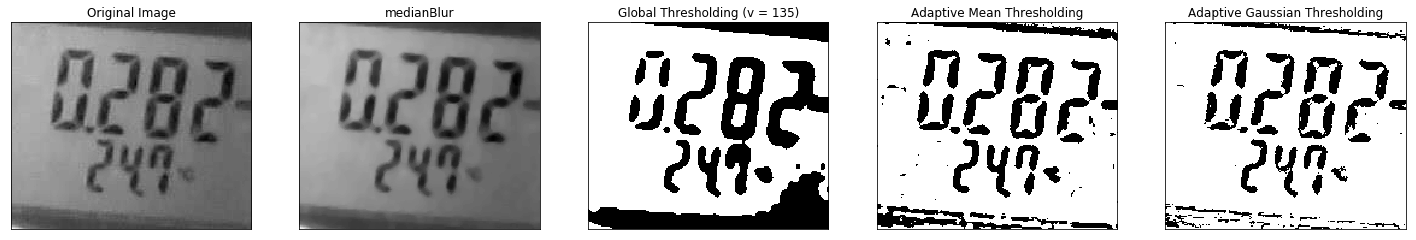

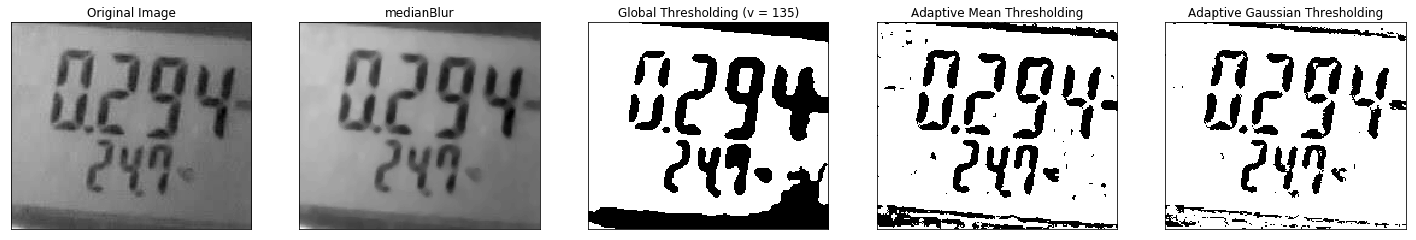

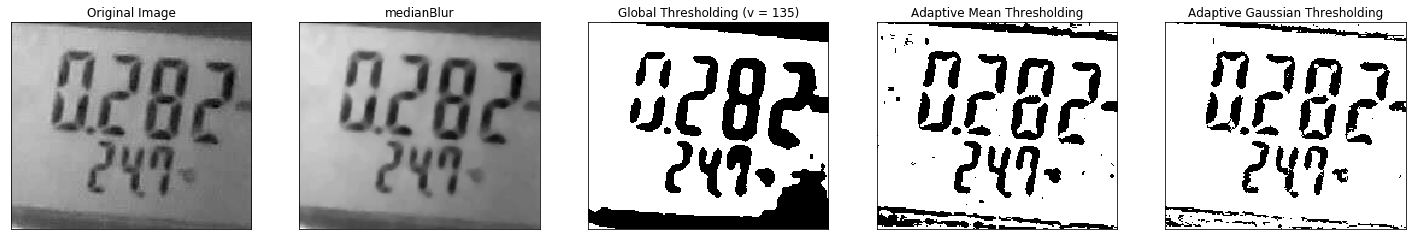

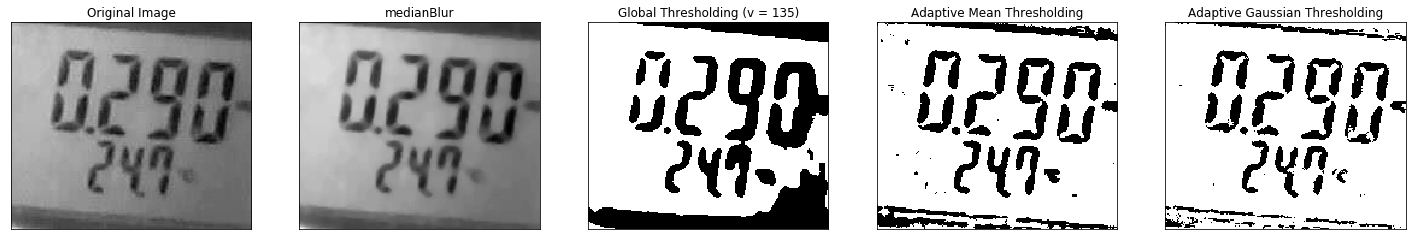

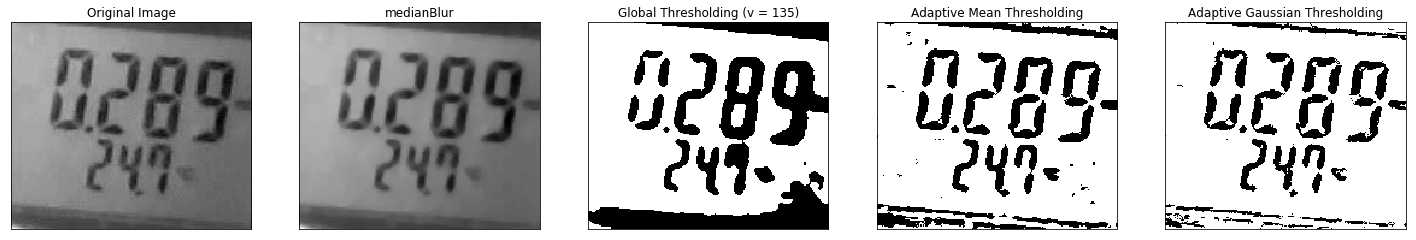

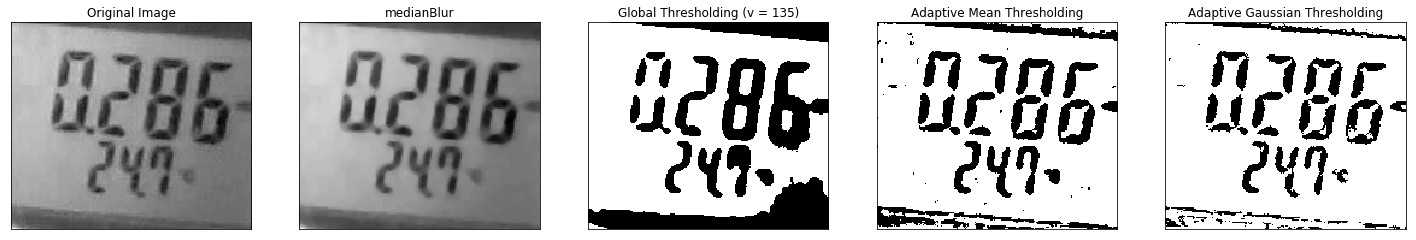

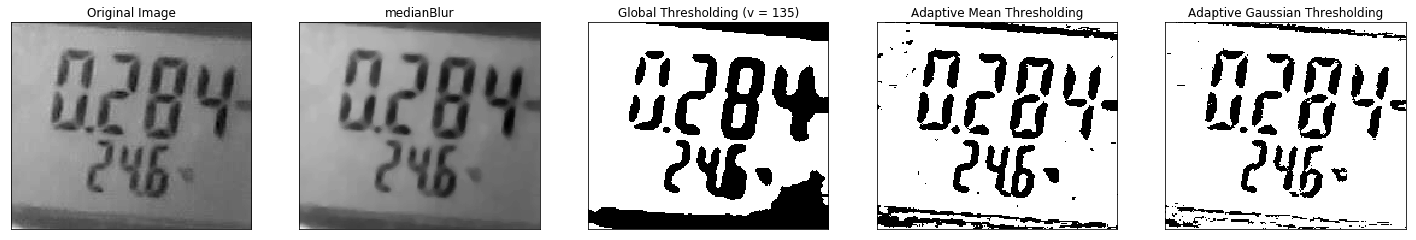

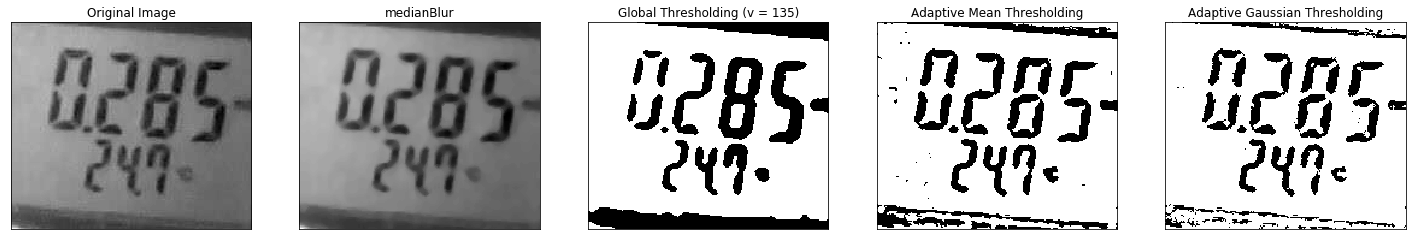

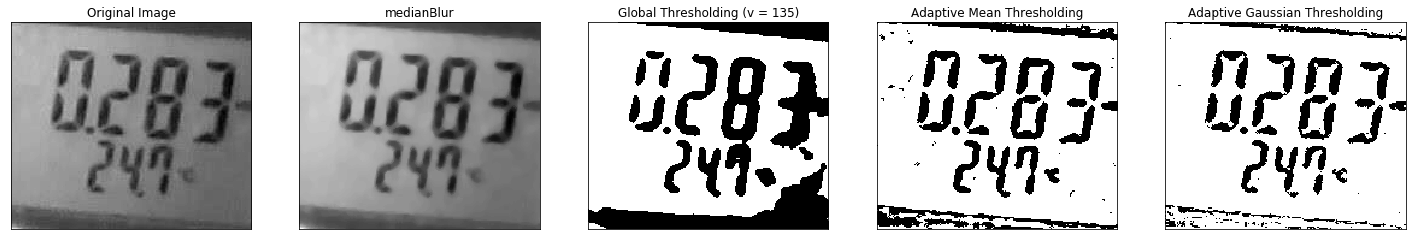

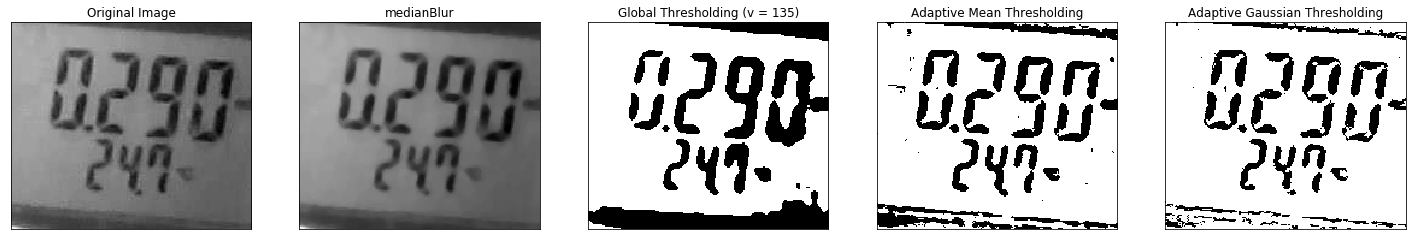

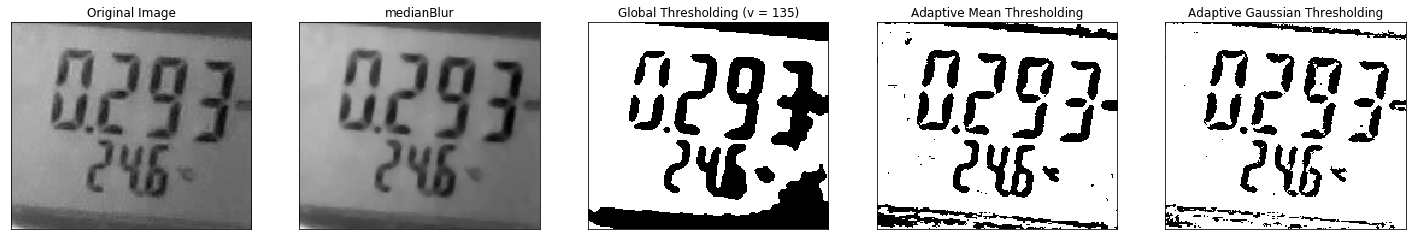

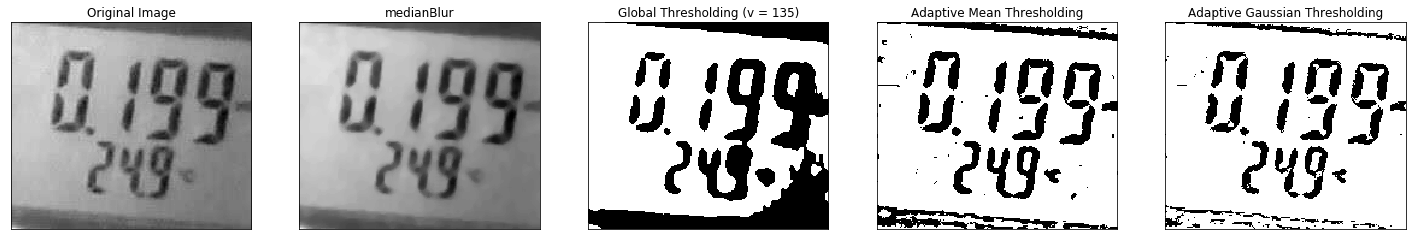

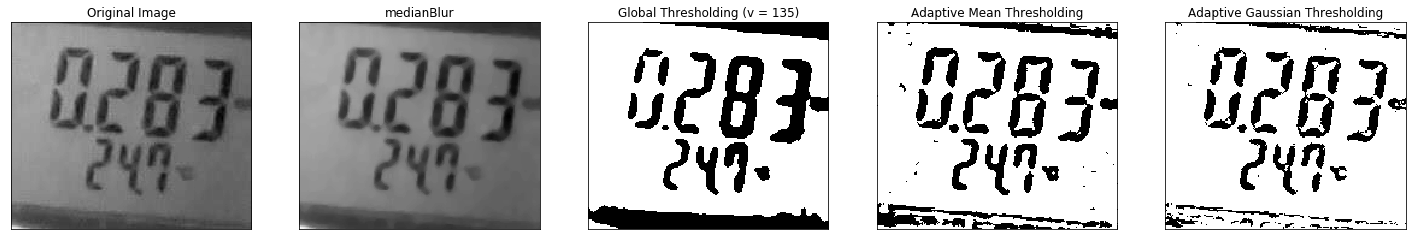

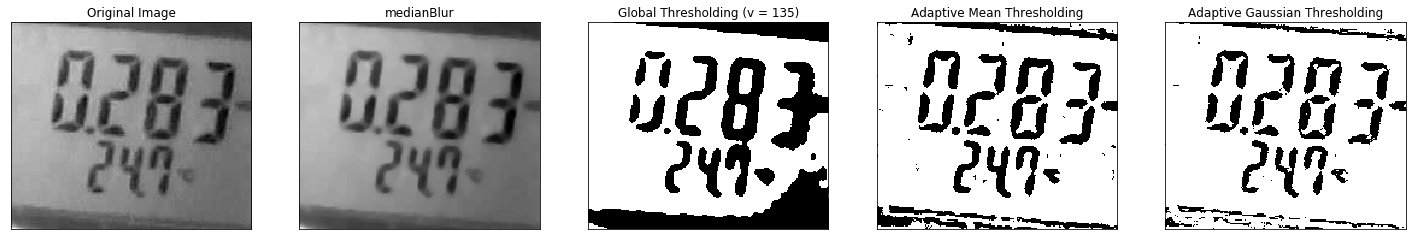

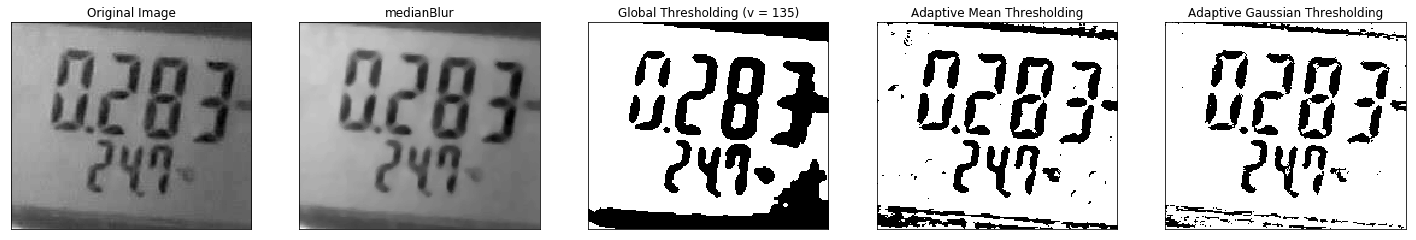

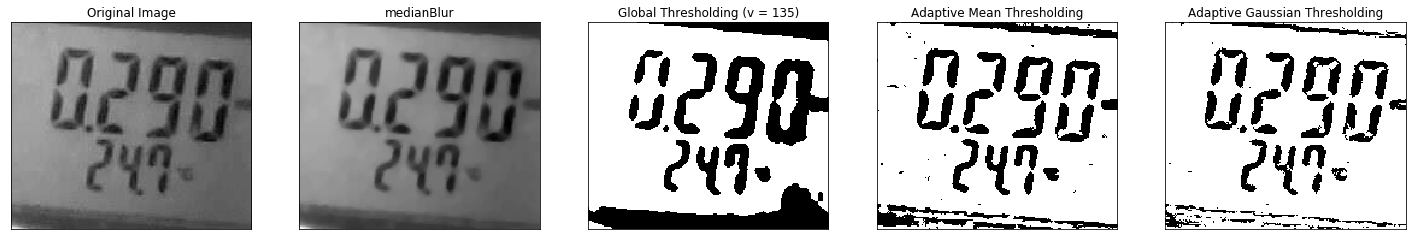

In [6]:
for i in range(len(rowfile)):
    img = []
    img = get_img(rowfile[i])

    save_img = Image.fromarray(img[2]) # 'Global Thresholding (v = 135)'を使用
    name = "test" + str(i) + ".tif"
    save_img.save("train_data/CD/"+ name)